# House Price Prediction


## Importing Libraries and data

In [27]:
import pandas as pd 
import numpy as np 
import seaborn as sb 
import matplotlib.pyplot as mp   
import warnings 
warnings.filterwarnings('ignore') 
data = pd.read_csv('data.csv') 
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [6]:
data.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [7]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [32]:
data['condition'].value_counts()

3    2875
4    1252
5     435
2      32
1       6
Name: condition, dtype: int64

In [8]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


## EDA (Exploratory Data Analysis)

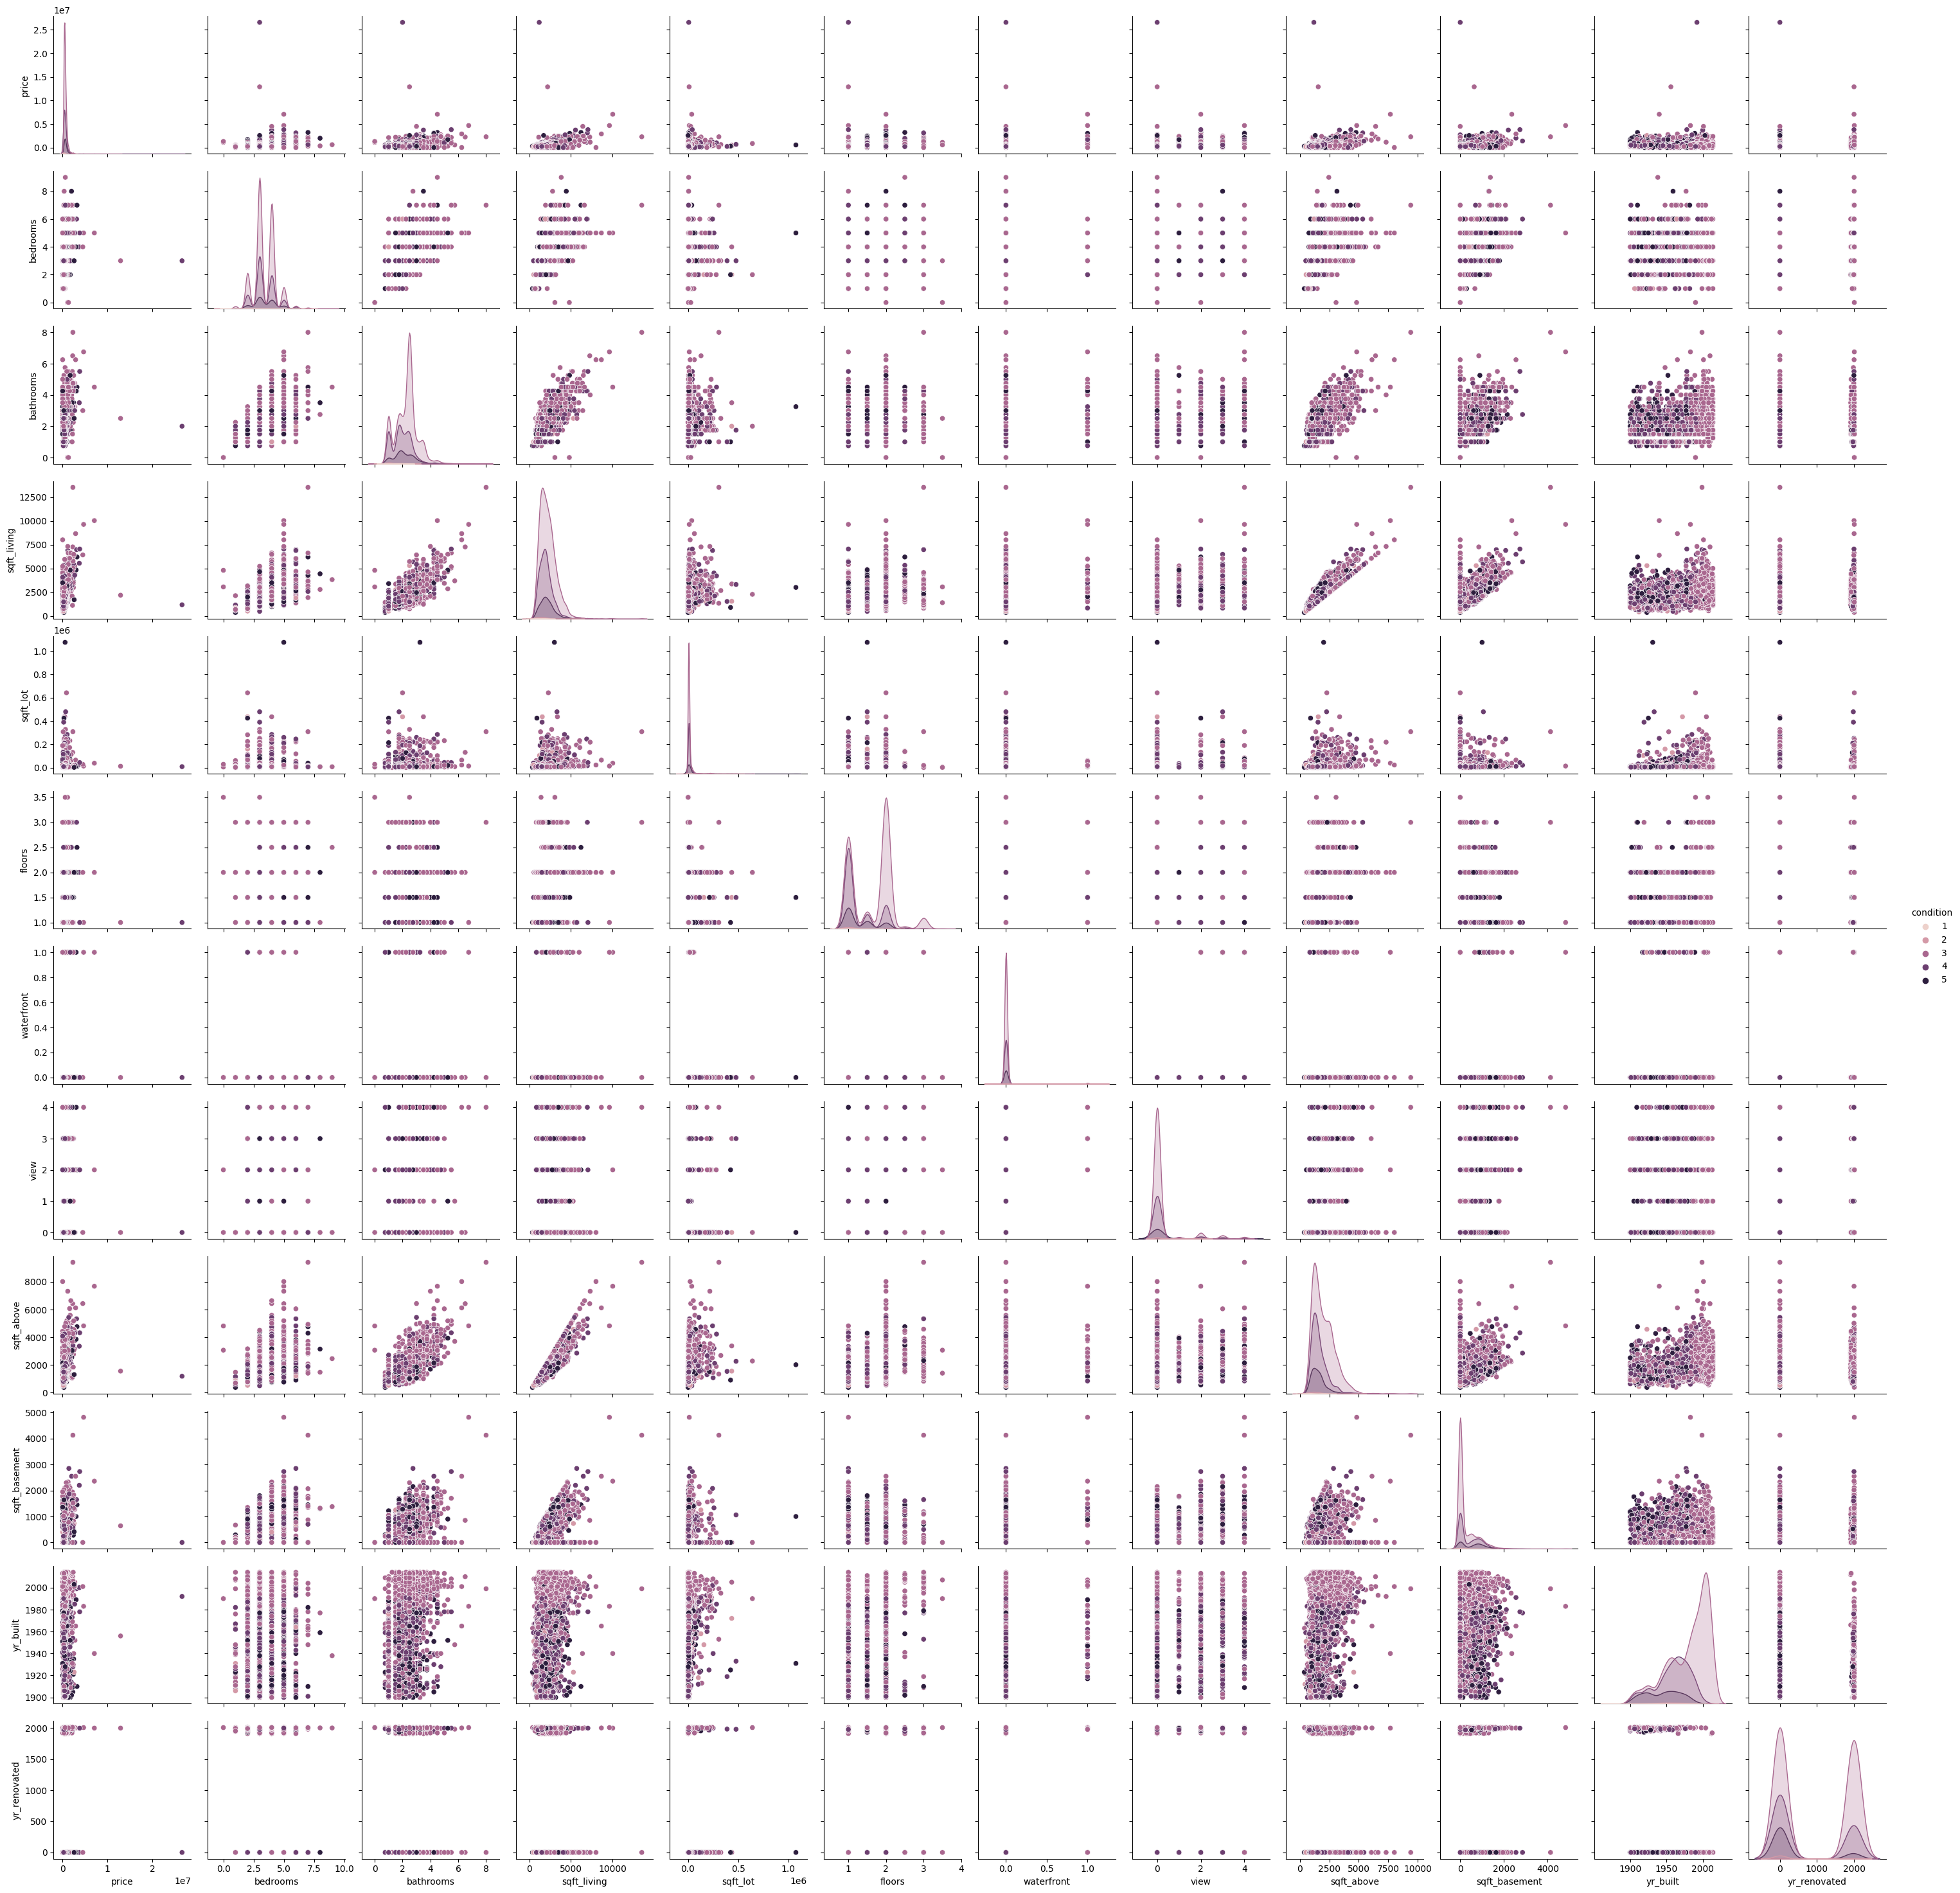

In [33]:
sb.pairplot(data , hue='condition')

<function matplotlib.pyplot.show(close=None, block=None)>

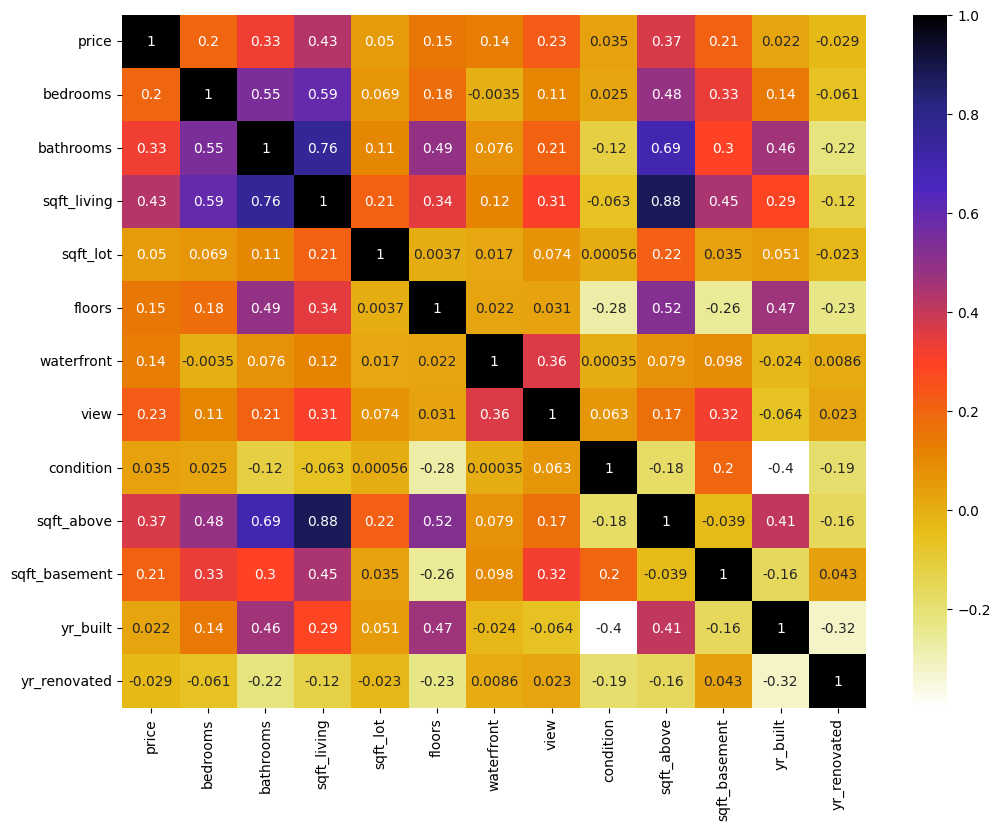

In [10]:

mp.figure(figsize=(12,9)) 
corelation = data.corr() 
sb.heatmap(corelation , annot = True , cmap=mp.cm.CMRmap_r) 
mp.show

## Model Building


<AxesSubplot: >

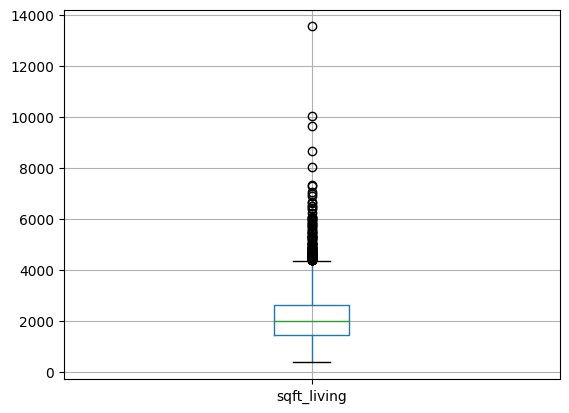

In [ ]:
data[['sqft_living' ]].boxplot() 


<AxesSubplot: >

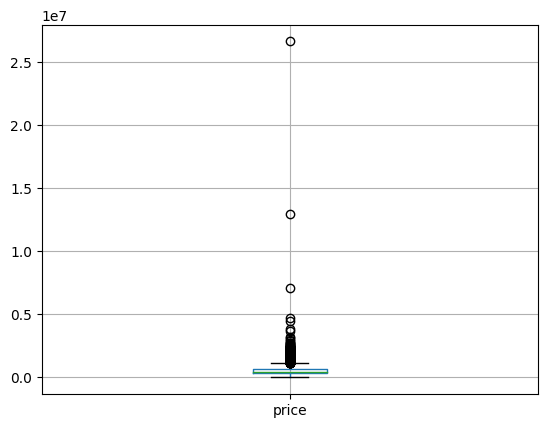

In [ ]:
data[['price']].boxplot()

In [ ]:
X = data[[ 'sqft_living']] 

y = data[['price']] 


In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
X_train , X_test , y_train , y_test = train_test_split(X  , y , test_size = 0.3, random_state = 400)   
X_train

,sqft_living
1709,2080
2586,2670
2588,3130
2092,1240
4114,3180
...,...
407,1445
140,1940
2366,970
3535,1650


In [ ]:
X_test

,sqft_living
4428,4260
2906,2430
1793,1370
751,2700
430,2660
...,...
1049,2000
1467,3610
4070,2340
2723,1230


In [ ]:
y_train

,price
1709,290000.00
2586,465000.00
2588,565000.00
2092,347000.00
4114,1115000.00
...,...
407,387000.00
140,555000.00
2366,315000.00
3535,259500.00


In [ ]:
y_test

,price
4428,435000.0
2906,1027000.0
1793,409950.0
751,525000.0
430,583000.0
...,...
1049,374000.0
1467,968000.0
4070,235500.0
2723,435000.0


In [ ]:
a = LinearRegression() 
a.fit(X_train , y_train)

LinearRegression()

In [ ]:
b = LinearRegression() 
b.fit(X_test , y_test)

LinearRegression()

In [ ]:
Y_train_predict = a.predict(X_train)  
Y_test_predict = b.predict(X_test)  


In [ ]:
Y_train_predict

array([[538071.2945048 ],
       [689331.15346369],
       [807262.56892316],
       ...,
       [253497.66154826],
       [427831.05831443],
       [750860.58761645]])

In [ ]:
Y_test_predict

array([[1064045.15169907],
       [ 619791.90560232],
       [ 362464.88873753],
       ...,
       [ 597943.38530248],
       [ 328478.30160445],
       [ 228946.15357184]])

# Evaluate Performance

In [ ]:
from sklearn.metrics import mean_squared_error , r2_score 
mse_train = mean_squared_error(y_train , y_train) 
r2_train = r2_score(y_train , y_train)   
mse_test = mean_squared_error(y_test , y_test) 
r2_test = r2_score(y_test , y_test) 

In [ ]:
mse_test 


0.0

TypeError: expected 1D vector for x

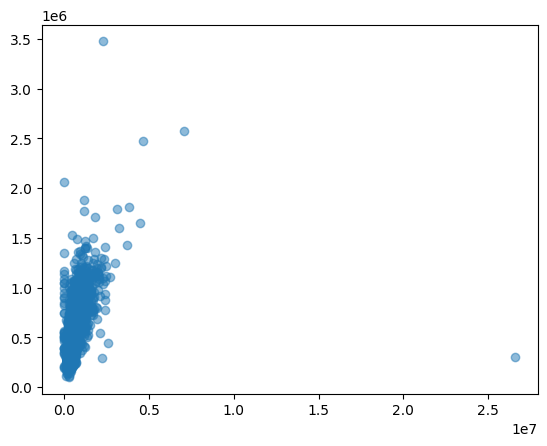

In [ ]:

mp.scatter(x = y_train , y= Y_train_predict , alpha=0.5)   
c = np.polyfit(y_train , Y_train_predict , 1) 
m = np.poly1d(c)
mp.plot(y_train, m(y_train) , '#F8766c')

TypeError: expected 1D vector for x

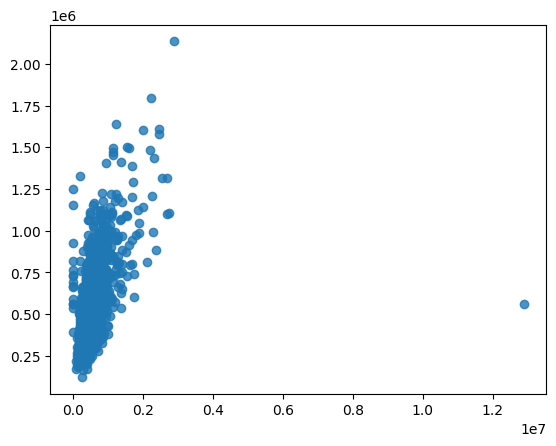

In [ ]:

mp.scatter(x = y_test , y = Y_test_predict , alpha=0.8)   
c = np.polyfit(y_test , Y_test_predict , 1) 
f = np.poly1d(c)
mp.plot(y_test, f(Y_test) , '#F8766D')

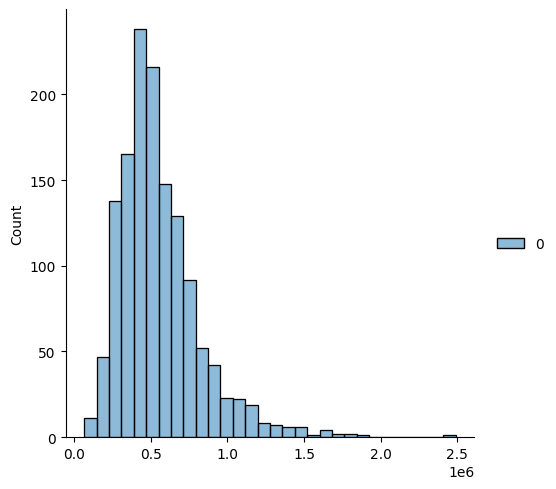

In [ ]:
sb.displot((Y_test_predict) , bins=30)